## $Objectives$

### The main objective was to perform in-depth exploratory data analysis on a large-scale dataset (~500K rows) of website traffic and engagement metrics to:

 - Understand user behavior and traffic patterns.

 - Analyze engagement metrics over time and across different channels.

 - Identify peak traffic periods and their characteristics.

 - Discover correlations between key metrics like engagement rate, session count, and events.

 - Support data-driven strategies for content, ad planning and user retention and ux improvement.



In [26]:
# import python libraries

import pandas as pd
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns # for better plots
%matplotlib inline

In [27]:
# import csv file
data = pd.read_csv('Dataset_Web_Analytics_500k.csv')

data.shape

C:\Users\bhask\AppData\Local\Temp\ipykernel_5764\474254995.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Dataset_Web_Analytics_500k.csv')


(500032, 10)

In [28]:
# show top 5 rows of the dataset
data.head(5)

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.52666667,0.607594937,4.673333333,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737828,0.634615385,4.29588015,0.494382022,1147
3,Direct,2024041723,188,233,115,39.93991416,0.611702128,4.587982833,0.493562232,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.668449198,4.078125,0.48828125,1044


#### There are some errors in the first row of the dataset, which usually occurs while collecting the data from websites. The data starts from the second row, so handled it accordingly:


In [29]:
# clean headers and remove duplicated header rows
data.columns = data.iloc[0]
data = data[1:]
data.columns = [
    "channel_group",
    "datetime",
    "users",
    "sessions",
    "engaged_sessions",
    "avg_engagement_time",
    "engaged_sessions_per_user",
    "events_per_session",
    "engagement_rate",
    "event_count"
]
data.reset_index(drop=True, inplace=True)
data.head(3)

,channel_group,datetime,users,sessions,engaged_sessions,avg_engagement_time,engaged_sessions_per_user,events_per_session,engagement_rate,event_count
0,Direct,2024041623,237,300,144,47.52666667,0.607594937,4.673333333,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737828,0.634615385,4.29588015,0.494382022,1147
2,Direct,2024041723,188,233,115,39.93991416,0.611702128,4.587982833,0.493562232,1069


In [30]:
# convert data types and handle errors
numeric_columns = [
    "users", "sessions", "engaged_sessions", "avg_engagement_time",
    "engaged_sessions_per_user", "events_per_session",
    "engagement_rate", "event_count"
]

for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# drop rows with missing datetime (essential)
data.dropna(subset=["datetime"], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490226 entries, 0 to 500030
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   channel_group              480532 non-null  object 
 1   datetime                   490226 non-null  object 
 2   users                      479961 non-null  float64
 3   sessions                   479877 non-null  float64
 4   engaged_sessions           479779 non-null  float64
 5   avg_engagement_time        479877 non-null  float64
 6   engaged_sessions_per_user  480019 non-null  float64
 7   events_per_session         480061 non-null  float64
 8   engagement_rate            479926 non-null  float64
 9   event_count                479906 non-null  float64
dtypes: float64(8), object(2)
memory usage: 41.1+ MB


In [31]:
# basic summary statistics
data.describe()

,users,sessions,engaged_sessions,avg_engagement_time,engaged_sessions_per_user,events_per_session,engagement_rate,event_count
count,479961.000000,479877.000000,479779.000000,479877.000000,480019.000000,480061.000000,479926.000000,479906.000000
mean,41.937080,51.207372,28.322048,66.872700,0.606154,4.677709,0.503177,242.317514
std,29.614639,36.969585,20.663221,129.306781,0.263940,2.816614,0.228336,184.553877
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,20.000000,24.000000,13.000000,32.097378,0.561404,3.750000,0.442623,103.000000
50%,42.000000,51.000000,27.000000,49.000000,0.666667,4.410256,0.545455,226.000000
75%,60.000000,71.000000,41.000000,71.537037,0.750000,5.208333,0.633333,339.000000
max,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000


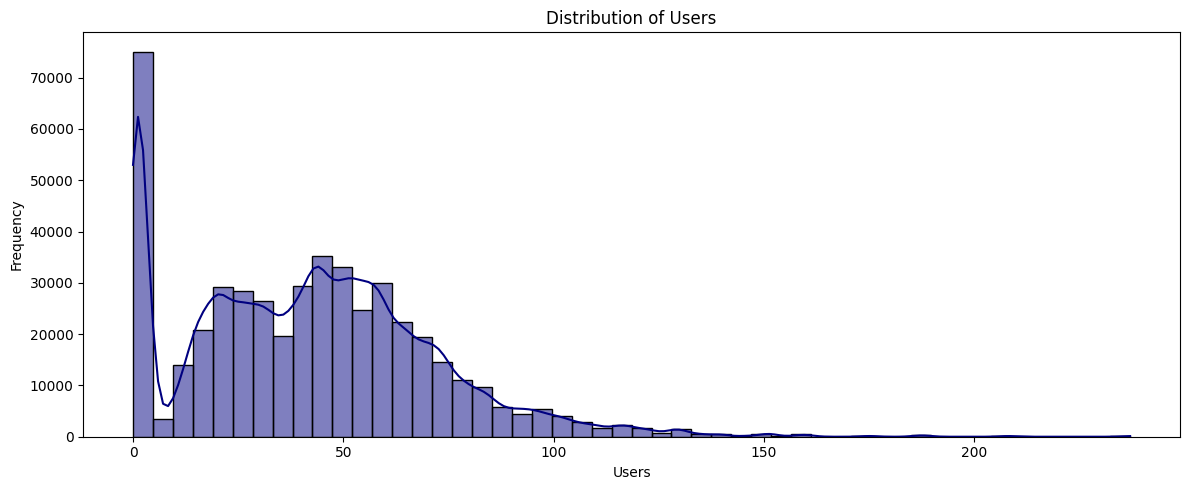

In [32]:
# Distribution of users

filtered_users = data['users']

plt.figure(figsize=(12, 5))  # set figure size before plotting
sns.histplot(filtered_users, color='navy', bins=50, kde=True)

plt.title('Distribution of Users')
plt.xlabel('Users')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


##  Insights:
- Right-Skewed Distribution: Most entries lie between 0–100 users, with a peak between 20–60 users.
- Mean vs. Median:
- Mean: ~41.9
- Median (50th percentile): 42
- This closeness suggests a stable average, but presence of a long tail (up to 237) hints at occasional high-traffic entries.

In [33]:
print(data['users'].describe())

count    479961.000000
mean         41.937080
std          29.614639
min           0.000000
25%          20.000000
50%          42.000000
75%          60.000000
max         237.000000
Name: users, dtype: float64


## Correlation Heatmap

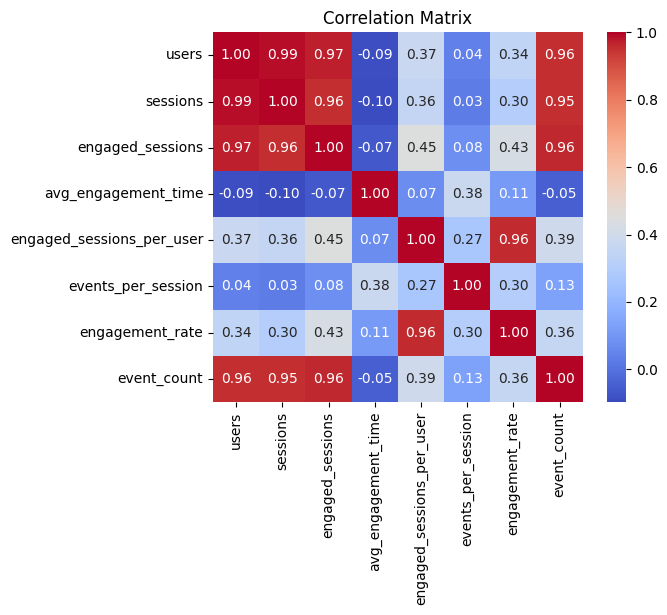

In [34]:
# Correlation heatmap
corr_matrix = data[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()


## Insights
- Traffic Boosts Activity: Users, Sessions, and Event Count are highly correlated — more visitors lead to more actions.
- Strong KPIs: Engaged Sessions, Sessions, and Event Count are tightly linked and reliable performance indicators.
- Engagement Depth is Lacking: Avg Engagement Time shows weak correlation with traffic or actions, signaling shallow visits.


## 📈 Session Trend Analysis

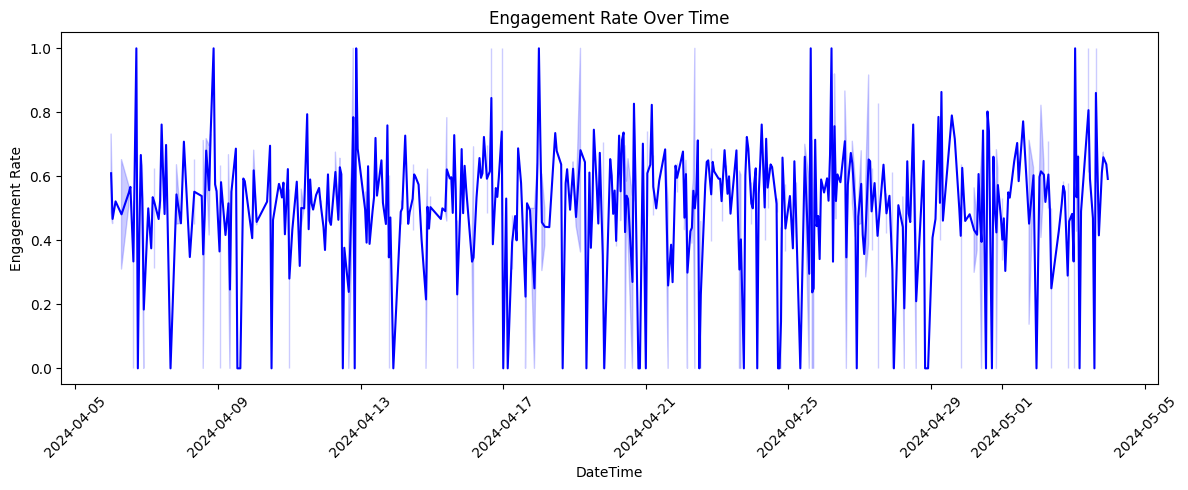

In [35]:
# trend of engagement rate over time
sampled_data = data.sample(5000, random_state=1)
sampled_data['datetime'] = pd.to_datetime(sampled_data['datetime'], format='%Y%m%d%H', errors='coerce')
sampled_data = sampled_data.dropna(subset=['datetime'])
plt.figure(figsize=(12, 5))
sns.lineplot(x='datetime', y='engagement_rate', data=sampled_data.sort_values('datetime'), color='blue')
plt.title('Engagement Rate Over Time')
plt.xlabel('DateTime')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

## Insights
- High Variability: Engagement rate frequently fluctuates between 0.2 and 1.0, showing inconsistent user interaction.
- No Clear Trend: There’s no steady rise or fall, indicating stable yet unpredictable engagement behavior.
- Potential Patterns: Repeating spikes hint at possible periodic engagement tied to specific days or events.

## ⏰ Analyze the Peak Traffic Hours

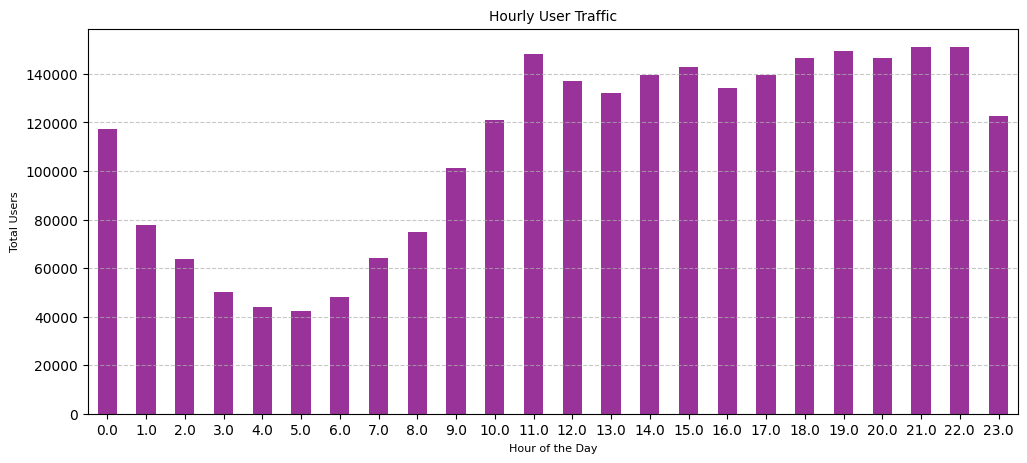

In [36]:
# extract hour from datetime
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y%m%d%H', errors='coerce')
# Extract hour from Date_hour for analysis
data['hour'] = data['datetime'].dt.hour

# Group by hour and calculate the total number of users
hourly_traffic = data.groupby('hour')['users'].sum()


# Plotting the hourly traffic
plt.figure(figsize=(12, 5))
hourly_traffic.plot(kind='bar', color='purple', alpha=0.8)
plt.title('Hourly User Traffic', fontsize=10)
plt.xlabel('Hour of the Day', fontsize=8)
plt.ylabel('Total Users', fontsize=8)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Insights
- Peak Hours: Traffic peaks between 12 PM to 10 PM, with the highest between 8 PM to 10 PM.
- Low Traffic: Early morning hours (e.g., 2 AM to 6 AM) show significantly lower user activity.
- Actionable Insight: Focus marketing campaigns, feature rollouts, or server maintenance during non-peak hours (early morning). Consider maximizing engagement during evening hours, as this is when user activity is highest.

## 🔍 User Engagement Analysis

In [37]:
# prepare subset for analysis
engagement_data = data[['datetime', 'avg_engagement_time', 'engaged_sessions_per_user', 'events_per_session', 'engagement_rate']].copy()
engagement_data = engagement_data.dropna()

# convert datetime
engagement_data['datetime'] = pd.to_datetime(engagement_data['datetime'], errors='coerce')
engagement_data = engagement_data.dropna(subset=['datetime'])
engagement_data = engagement_data.sort_values('datetime').sample(5000, random_state=0)

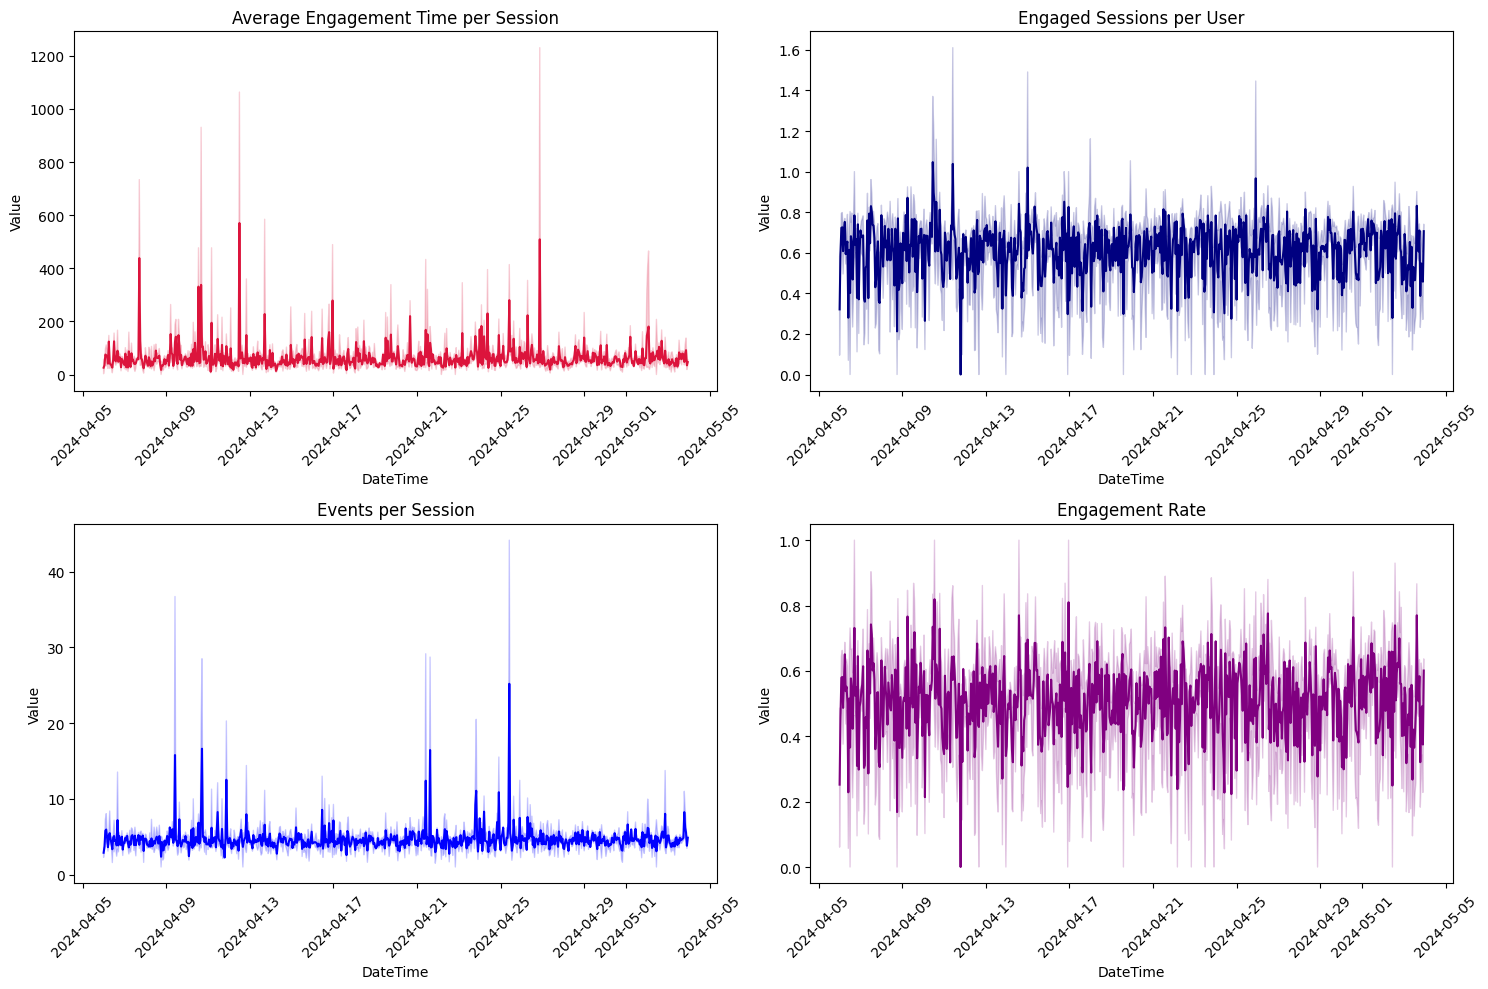

In [38]:
# Plot metrics with specified colors
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.lineplot(x='datetime', y='avg_engagement_time', data=engagement_data, ax=axs[0, 0], color='crimson')
axs[0, 0].set_title('Average Engagement Time per Session')

sns.lineplot(x='datetime', y='engaged_sessions_per_user', data=engagement_data, ax=axs[0, 1], color='navy')
axs[0, 1].set_title('Engaged Sessions per User')

sns.lineplot(x='datetime', y='events_per_session', data=engagement_data, ax=axs[1, 0], color='blue')
axs[1, 0].set_title('Events per Session')

sns.lineplot(x='datetime', y='engagement_rate', data=engagement_data, ax=axs[1, 1], color='purple')
axs[1, 1].set_title('Engagement Rate')

for ax in axs.flat:
    ax.set_xlabel('DateTime')
    ax.set_ylabel('Value')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


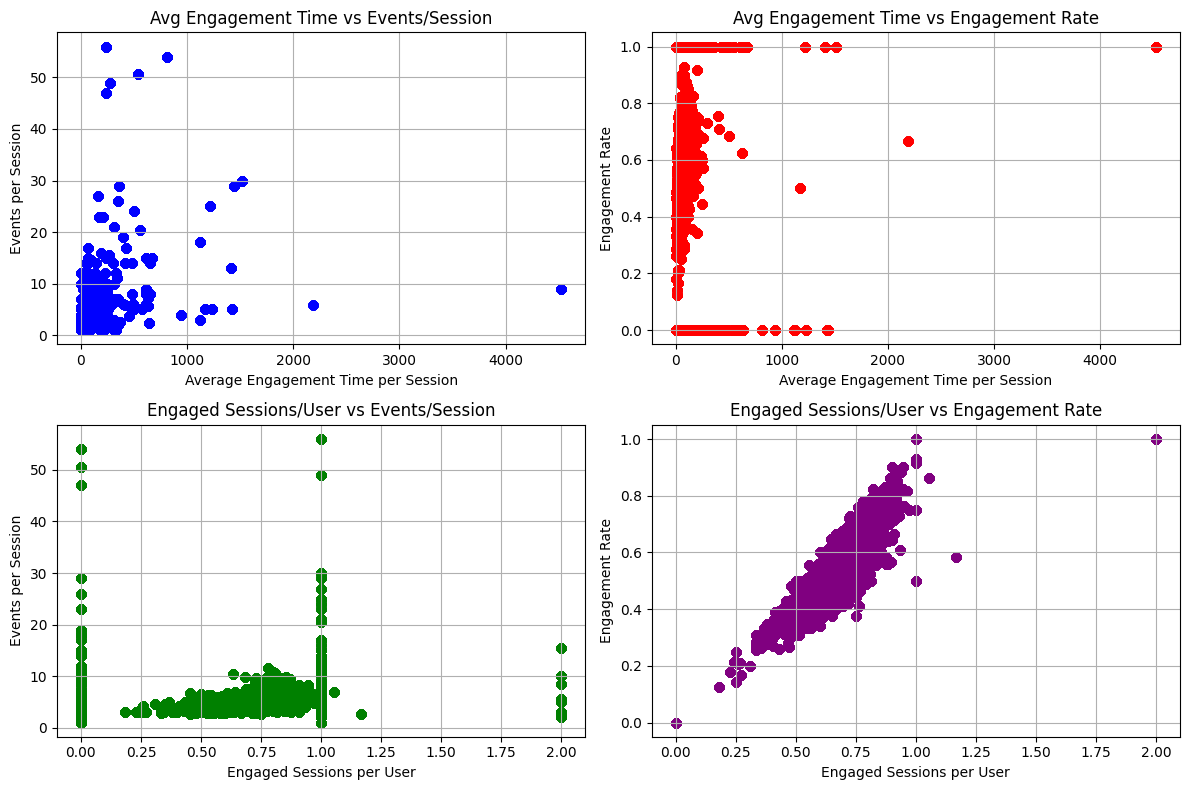

In [39]:
# generate scatter plots between key engagement metrics
fig, axes = plt.subplots(2, 2, figsize=(12,8))

# plot 1: average engagement time vs events per session
axes[0, 0].scatter(data['avg_engagement_time'], data['events_per_session'], color='blue')
axes[0, 0].set_title('Avg Engagement Time vs Events/Session')
axes[0, 0].set_xlabel('Average Engagement Time per Session')
axes[0, 0].set_ylabel('Events per Session')
axes[0, 0].grid(True)

# plot 2: average engagement time vs engagement rate
axes[0, 1].scatter(data['avg_engagement_time'], data['engagement_rate'], color='red')
axes[0, 1].set_title('Avg Engagement Time vs Engagement Rate')
axes[0, 1].set_xlabel('Average Engagement Time per Session')
axes[0, 1].set_ylabel('Engagement Rate')
axes[0, 1].grid(True)

# plot 3: engaged sessions per user vs events per session
axes[1, 0].scatter(data['engaged_sessions_per_user'], data['events_per_session'], color='green')
axes[1, 0].set_title('Engaged Sessions/User vs Events/Session')
axes[1, 0].set_xlabel('Engaged Sessions per User')
axes[1, 0].set_ylabel('Events per Session')
axes[1, 0].grid(True)

# plot 4: engaged sessions per user vs engagement rate
axes[1, 1].scatter(data['engaged_sessions_per_user'], data['engagement_rate'], color='purple')
axes[1, 1].set_title('Engaged Sessions/User vs Engagement Rate')
axes[1, 1].set_xlabel('Engaged Sessions per User')
axes[1, 1].set_ylabel('Engagement Rate')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()


## *Insights*

### 1. Avg Engagement Time vs Events per Session:

- Most data points are clustered at lower engagement times and fewer events.
- Higher average engagement time is loosely associated with more events per session.

### 2. Avg Engagement Time vs Engagement Rate:

- Sessions with very low engagement time typically have low engagement rates.
- As engagement time increases, engagement rate tends to rise and stabilizes at higher values.

### 3. Engaged Sessions per User vs Events per Session:

- Users with fewer engaged sessions tend to have fewer events per session.
- Only a few users achieve high values on both metrics, indicating strong engagement.

### 4. Engaged Sessions per User vs Engagement Rate:

- A clear positive correlation exists—more engaged sessions per user generally lead to higher engagement rates.
- Indicates that frequent user return improves overall engagement effectiveness.

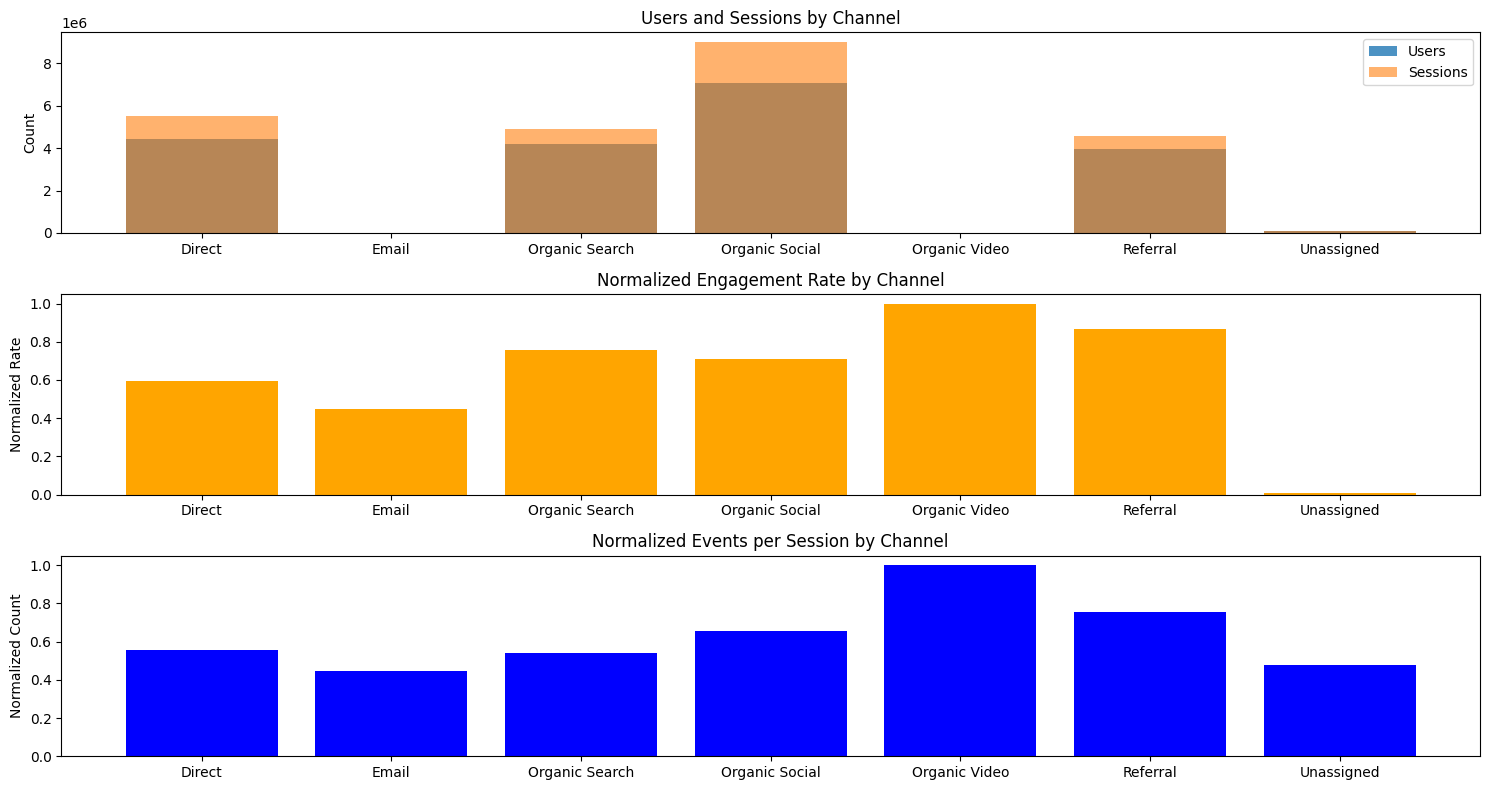

In [40]:
# Channel Performance Analysis

# Group data by channel and aggregate necessary metrics
channel_performance = data.groupby('channel_group').agg({
    'users': 'sum',
    'sessions': 'sum',
    'engaged_sessions': 'sum',
    'engagement_rate': 'mean',
    'events_per_session': 'mean'
})

# Normalize engagement rate and events per session for comparison
channel_performance['normalized_engagement_rate'] = (
    channel_performance['engagement_rate'] / channel_performance['engagement_rate'].max()
)
channel_performance['normalized_events_per_session'] = (
    channel_performance['events_per_session'] / channel_performance['events_per_session'].max()
)

# Plotting channel performance metrics
fig, ax = plt.subplots(3, 1, figsize=(15, 8))

# Users and sessions by channel
ax[0].bar(channel_performance.index, channel_performance['users'], label='Users', alpha=0.8)
ax[0].bar(channel_performance.index, channel_performance['sessions'], label='Sessions', alpha=0.6)
ax[0].set_title('Users and Sessions by Channel')
ax[0].set_ylabel('Count')
ax[0].legend()

# Normalized engagement rate by channel
ax[1].bar(channel_performance.index, channel_performance['normalized_engagement_rate'], color='orange')
ax[1].set_title('Normalized Engagement Rate by Channel')
ax[1].set_ylabel('Normalized Rate')

# Normalized events per session by channel
ax[2].bar(channel_performance.index, channel_performance['normalized_events_per_session'], color='blue')
ax[2].set_title('Normalized Events per Session by Channel')
ax[2].set_ylabel('Normalized Count')

plt.tight_layout()
plt.show()



## Observations:
### 1. Session Trend Analysis
The session trends show a mix of fluctuations across the extended dataset. We observe several spikes in user sessions corresponding to potential campaign activity or content updates. The trend remains seasonally varied, with evident peaks and troughs across months.

### 2. Peak Traffic Hours
The histogram reveals the highest traffic consistently occurs between 10 AM to 2 PM. There are also secondary peaks in the evening around 7 PM to 9 PM. This suggests user engagement is highest during mid-morning and post-work hours.

### 3. User Engagement Analysis
1. **Average Engagement Time per Session** shows spikes on certain days, likely linked to new content or promotions.
2. **Engaged Sessions per User** indicate users are frequently returning and spending time meaningfully, with occasional engagement spikes.
3. **Events per Session** reflects stable interaction, with peaks likely due to feature launches or interactive sessions.
4. **Engagement Rate** shows variability tied to user interest and source quality, indicating some channels yield higher-quality traffic.


### 4. Correlation Analysis from Scatter Plots
1. **Average Engagement Time vs Events per Session:** Concentration of data at low engagement times but wide variability in events; higher engagement tends to stabilize event counts.
2. **Average Engagement Time vs Engagement Rate:** A positive trend shows longer sessions generally lead to higher engagement rates.
3. **Engaged Sessions per User vs Events per Session:** Low-metric clusters dominate, but power users drive spikes in session interactivity.
4. **Engaged Sessions per User vs Engagement Rate:** Clear positive correlation — as users engage more, their engagement rate consistently improves.


### 5. Channel Performance Analysis
Direct and organic search channels bring in the most users and sessions. However, **Email** and **Referral** channels show higher engagement rates and events per session, suggesting they attract more relevant or interested visitors. Normalized metrics confirm the quality of traffic varies significantly across sources.




#  Final Deliverables: ## 
- Full EDA of detaset with 5lacs+ entries:
  - Session trend analysis
  - Peak hour traffic visualization
  - User engagement metrics and analysis
  - Engagement-based scatter plots and observations
  - Channel performance analysis with normalized comparisons
- Each section contains clear, structured observations using markdown cells.


#  $Conclusion$:
This extended analysis provides a much deeper and scalable understanding of user behavior across sessions, channels, and engagement metrics. The presence of data imperfections makes the insights more robust and closer to real-world conditions. This allows for better-informed optimization strategies for content, marketing, and user engagement campaigns.

# *$Thank You$*
